**Creating own dataset using google images search.**

In [0]:
from fastai.vision import *

Go to [Google Images](http://images.google.com) and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.
Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button, and continue scrolling.

It is a good idea to put things you want to exclude into the search query, for instance if you are searching for Natalie Portman it might be a good idea to exclude Keira Knightley:

    Natalie Portman -Keira

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for your dataset.

Press Ctrl+Shift+J in Windows/Linux and a small window, the javascript console will appear. That is where you will paste the javascript commands.

You will need to get the URLs of each of the images. Before running the following commands, you may want to disable ad blocking extensions (uBlock, Adblock Plus, etc.) in Chrome. Otherwise the window.open() command doesn't work. Then you can run the following commands:

    urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
    window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));

These scripts will downlaod files, name the files as per your class. In this case they will be Amy.csv and Isla.csv, since I am making a classifier which classifies a photo as Amy Adams or Isla Fisher since they look alike :P.

In [0]:
folder = 'Amy'

In [0]:
path = Path('data/actors')
dest = path/folder
dest.mkdir(parents = True, exist_ok = True)

In [7]:
path.ls()

[PosixPath('data/actors/Adams'), PosixPath('data/actors/Amy')]

In [0]:
folder = 'Isla'

In [0]:
dest = path/folder
dest.mkdir(parents = True, exist_ok=True)


Now upload the CSV files which were downloaded using the Javascript code.

In [0]:
from google.colab import files

In [15]:
uploaded = files.upload()

Saving Amy.csv to Amy.csv
Saving Isla.csv to Isla.csv


In [16]:
ls

Amy.csv  data/  Isla.csv  sample_data/


In [17]:
ls data

actors/


In [18]:
ls data/actors

Amy/  Isla/


Now let's downlaod the images using those links

In [19]:
download_images('Amy.csv', path/'Amy', max_pics = 300)

Error https://www.thewrap.com/wp-content/uploads/2019/10/Amy-Adams-Laura-Dern.jpg HTTPSConnectionPool(host='www.thewrap.com', port=443): Read timed out. (read timeout=4)


In [20]:
download_images('Isla.csv', path/'Isla', max_pics = 300)

Error https://www.thewrap.com/wp-content/uploads/2014/10/isla-fisher.jpg HTTPSConnectionPool(host='www.thewrap.com', port=443): Read timed out. (read timeout=4)
Error https://www.thewrap.com/wp-content/uploads/2019/09/Isla-Fisher-200x300.jpg HTTPSConnectionPool(host='www.thewrap.com', port=443): Read timed out. (read timeout=4)


Now verify the images for corrupt files or different numbers of channels and delete them.

In [21]:
verify_images(path/'Amy', delete = True)

cannot identify image file <_io.BufferedReader name='data/actors/Amy/00000277.jpg'>
cannot identify image file <_io.BufferedReader name='data/actors/Amy/00000093.jpg'>
cannot identify image file <_io.BufferedReader name='data/actors/Amy/00000085.png'>
cannot identify image file <_io.BufferedReader name='data/actors/Amy/00000008.jpg'>
cannot identify image file <_io.BufferedReader name='data/actors/Amy/00000210.jpg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:967: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:967: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'


In [22]:
verify_images(path/'Isla', delete = True)

cannot identify image file <_io.BufferedReader name='data/actors/Isla/00000268.png'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:967: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:967: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data/actors/Isla/00000215.jpg'>
cannot identify image file <_io.BufferedReader name='data/actors/Isla/00000058.jpg'>
cannot identify image file <_io.BufferedReader name='data/actors/Isla/00000249.jpg'>
cannot identify image file <_io.BufferedReader name='data/actors/Isla/00000065.jpg'>
cannot identify image file <_io.BufferedReader name='data/actors/Isla/00000156.jpg'>
cannot identify image file <_io.BufferedReader name='data/actors/Isla/00000267.jpg'>
cannot identify image file <_io.BufferedReader name='data/actors/Isla/00000094.jpg'>
cannot identify image file <_io.BufferedReader name='data/actors/Isla/00000077.jpg'>
tuple index out of range


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms = get_transforms(),
                                  size = 224, num_workers = 4).normalize(imagenet_stats)

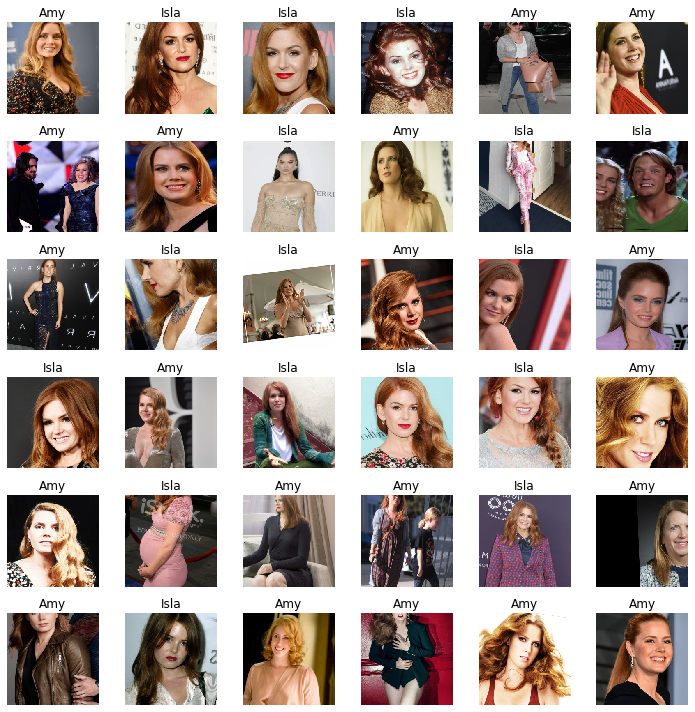

In [24]:
data.show_batch(rows = 6, figsize = (10, 10))

In [25]:
# Seeing the lengths and doing a sanity check
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Amy', 'Isla'], 2, 456, 113)

In [26]:
learn = cnn_learner(data, models.resnet34, metrics = accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:03<00:00, 27.0MB/s]


In [27]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


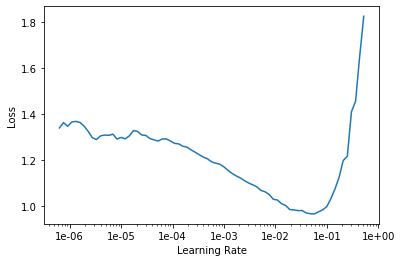

In [28]:
learn.recorder.plot()

In [29]:
learn.fit_one_cycle(6, max_lr = slice(1e-4, 1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,1.213675,1.132624,0.646018,00:21
1,1.061593,1.062284,0.699115,00:21
2,0.901663,1.034337,0.672566,00:21
3,0.785788,0.788672,0.725664,00:21
4,0.681200,0.663954,0.778761,00:21
5,0.610886,0.629589,0.787611,00:21


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [32]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


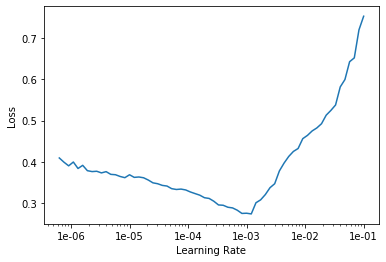

In [33]:
learn.recorder.plot()

In [34]:
learn.fit_one_cycle(4, max_lr=slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.386763,0.580230,0.805310,00:21
1,0.343941,0.520874,0.814159,00:21
2,0.304044,0.529058,0.805310,00:21
3,0.280817,0.531121,0.814159,00:21


In [0]:
learn.save('stage-2')

In [36]:
interp = ClassificationInterpretation.from_learner(learn)

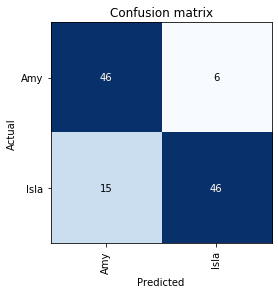

In [37]:
interp.plot_confusion_matrix()

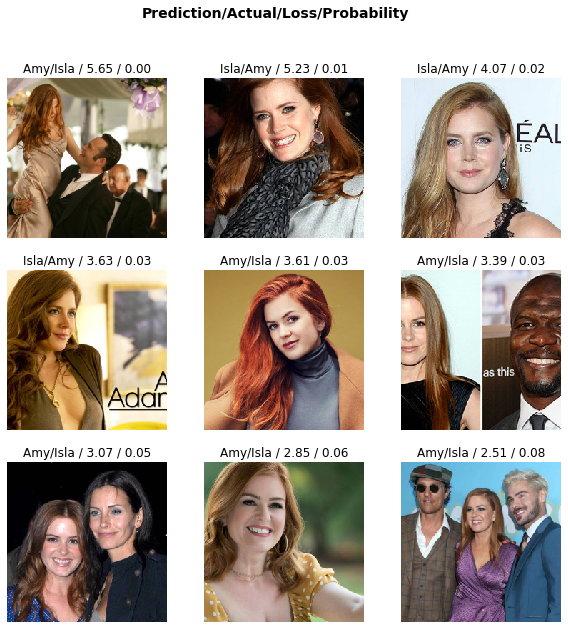

In [38]:
interp.plot_top_losses(9, figsize = (10, 10))

Many of our losses aren't becuase of bad performance by our model but because there are multiple people in a photo where there should have only been one of the actors. So we will rectify that by removing those images.

Using the `ImageCleaner` widget from `fastai.widgets` we can prune our top losses. removing photos that don't belong.

Sadly I don't have a CUDA enabled GPU and the widget doesn't run in Google colab since apparently it uses Jupyter Lab instead of Jupyter Notebook. So I cannot use the widgets since it will be  probably too slow in my CPU :'(.